**Código Base**

In [7]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

In [8]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
churn_df = pd.read_csv("telecom_churn_clean.csv")

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [13]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np

In [14]:
X_new = np.array([[56.8, 17.5],  # primeira observação
                  [24.4, 24.1],  # segunda  observação
                  [50.1, 10.9]]) # terceira observação
print(X_new.shape)

(3, 2)


In [15]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [1]:
from sklearn.neighbors import KNeighborsClassifier

k-Nearest Neighbors: Ajuste do Modelo

In [16]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

k-Nearest Neighbors: Predição

In [17]:
import numpy as np  

# Novas observações  
X_new = np.array([[30.0, 17.5],  
                  [107.0, 24.1],  
                  [213.0, 10.9]])  

# Predict the labels for the X_new  
y_pred = knn.predict(X_new)  

# Print the predictions  
print("Predictions: {}".format(y_pred))  


Predictions: [0 1 0]


Divisão Treino/Teste + Cálculo da Acurácia

In [18]:
# Import the module
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  

X = churn_df.drop("churn", axis=1).values  
y = churn_df["churn"].values  

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

# Create KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)  

# Fit the classifier to the training data
knn.fit(X_train, y_train)  

# Print the accuracy
print(knn.score(X_test, y_test))  


0.8545727136431784


c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~

Overfitting e Underfitting


In [20]:
neighbors = np.arange(1, 13)  
train_accuracies = {}  
test_accuracies = {}  

for neighbor in neighbors:  
    # Set up a KNN Classifier  
    knn = KNeighborsClassifier(n_neighbors=neighbor)  

    # Fit the model  
    knn.fit(X_train, y_train)  

    # Compute accuracy  
    train_accuracies[neighbor] = knn.score(X_train, y_train)  
    test_accuracies[neighbor] = knn.score(X_test, y_test)  

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)  


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


gráfico

In [19]:

import matplotlib.pyplot as plt

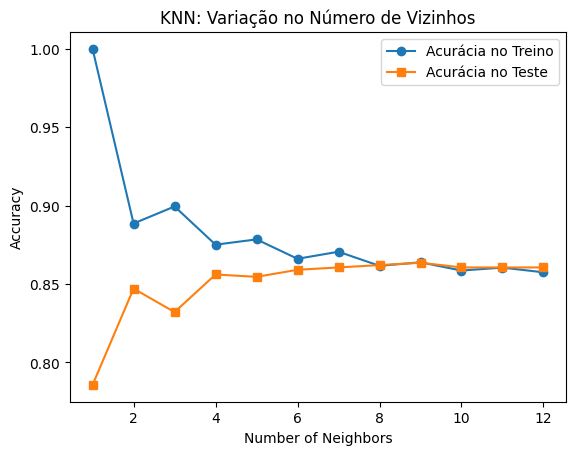

In [21]:
# Add a title
plt.title("KNN: Variação no Número de Vizinhos")  

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino", marker='o')  

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste", marker='s')  

plt.legend()  
plt.xlabel("Number of Neighbors")  
plt.ylabel("Accuracy")  

# Display the plot
plt.show()  
